# Ejercicio 1: Regresion Lineal (Python)

In [1]:
# Importar librerias
# Script compatible solo con Python3
# https://www.codecogs.com/latex/eqneditor.php
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1 Regresion lineal con una sola variable
En este ejercicio, implementaremos la regresión lineal con una variable para predecir las ganancias de un camión de comida (Foodtruck). Supongamos que usted es el director ejecutivo (CEO) de una franquicia de restaurantes y están considerando diferentes ciudades para expandir el negocio.
La cadena ya tiene camiones en varias ciudades y tiene datos de las ganancias y la poblacion de las ciudades.

El archivo ex1data1.txt contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna es la población por ciudad y la segunda columna es la ganancia de un camión de comida en esa ciudad. Un valor negativo indica una pérdidas en la ganancia.

In [2]:
datafile = 'data/ex1data1.txt'  #Importar datos
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #leer CSV con numpy
# Crear la matriz "X" y el vector "y"
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # Numero de ejemplos de entrenamiento
#Insertar la columna de 1's en la matriz "X"
X = np.insert(X,0,1,axis=1)

### 1.1 Graficar los datos

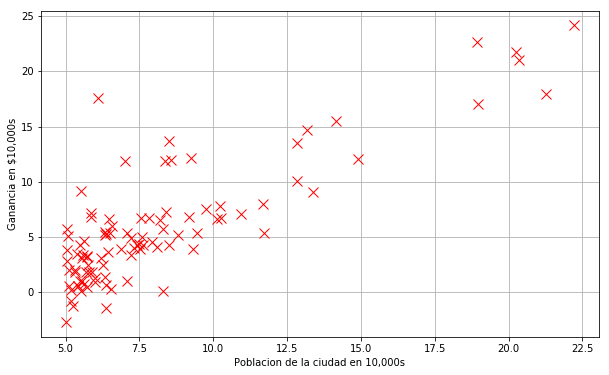

In [3]:
#Graficar los datos para ver como son
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Activar el grid de la grafica
plt.ylabel('Ganancia en $10,000s')
plt.xlabel('Poblacion de la ciudad en 10,000s');

### 1.2 Gradiente descendente
El objetivo de la regresión lineal es minimizar la función de costo

$ J\left ( \Theta  \right )= \frac{1}{2m}\sum_{i=1}^{m}\left ( h_{\Theta }\left ( x^{\left ( i \right )} \right ) - y^{\left ( i \right )} \right)^{2}  $

donde la hipótesis $  h_{\Theta }\left ( x \right ) $ viene dada por el modelo lineal

$h_{\Theta }\left ( x \right ) = \Theta ^{T}x = \Theta _{0}+\Theta _{1}x_{1}$



In [29]:
iterations = 1500
alpha = 0.01

In [30]:
def h(theta,X): #Funcion de Hipotesis lineal
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Funcion de Costo
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #nota: *.shape es (filas, columnas)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

# el Test que corre computeCost con theta igual a 0's da como resultado 32.07:

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print(computeCost(initial_theta,X,y))

32.07273387745567


In [31]:
#Rutina Actual de minimizar el gradiente descendente
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Se usa para dibujar el costo dependiendo de cada iteracion
    thetahistory = [] #Se usa praa visualizar el trayecto de la minimizacion
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        #Simultaneamente actualizando los valores de theta
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

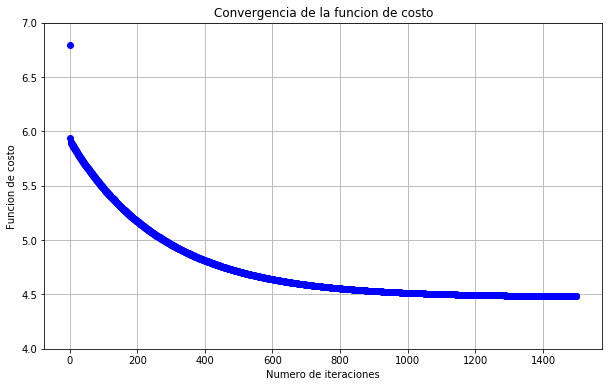

In [32]:
#Utilizar el gradiente descendente para obtener los mejores valores de theta
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

#Graficar la convergencia de la funcion de costo
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergencia de la funcion de costo")
    plt.xlabel("Numero de iteraciones")
    plt.ylabel("Funcion de costo")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    
plotConvergence(jvec)
dummy = plt.ylim([4,7])

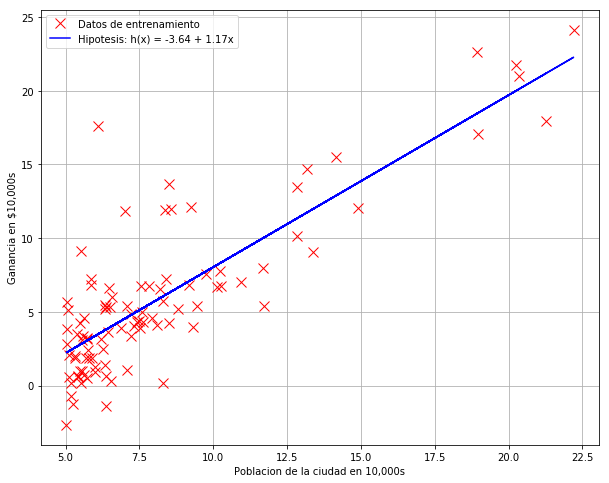

In [33]:
# Graficar una linea sobre los datos para verificar si esta bien
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,8))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Datos de entrenamiento')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hipotesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) 
plt.ylabel('Ganancia en $10,000s')
plt.xlabel('Poblacion de la ciudad en 10,000s')
plt.legend();

In [37]:
# Predecir la ganancia para ciudades con una poblacion de 35000 y 70000
#https://github.com/JWarmenhoven/Coursera-Machine-Learning
print('Hipotesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
print('La ganancia en una ciudad con una poblacion de 35000 es = ${}'.format(theta[:2].T.dot([1, 3.5])[0]*10000))
print('La ganancia en una ciudad con una poblacion de 70000 es = ${}'.format(theta[:2].T.dot([1, 7])[0]*10000))

Hipotesis: h(x) = -3.64 + 1.17x
La ganancia en una ciudad con una poblacion de 35000 es = $4483.985780975752
La ganancia en una ciudad con una poblacion de 70000 es = $45328.606316746496


### 1.4 Visualizando _J($\theta$)_

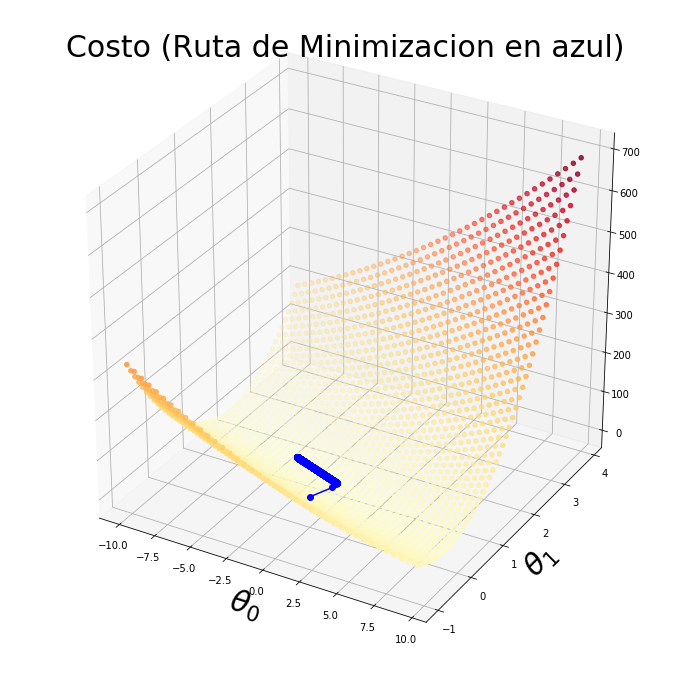

In [10]:
#Importar las librerias necesarias de Matplotlib para hacer graficas 3D
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Costo (Ruta de Minimizacion en azul)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

## 1.5 solucion usando librerias de machine learning

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # Crear el objeto de regresion lineal
#cargar los datos en x y y, mirar principio del jupyter notebook
x = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
regr.fit(x,y)
# Realizar predicciones
# regr.predict(3.5)[0][0] la respuesta es un array
print('Hipotesis: h(x) = %0.2f + %0.2fx'%(regr.intercept_,regr.coef_))
print('La ganancia en una ciudad con una poblacion de 35000 es = ${}'.format(regr.predict(3.5)[0][0]*10000))
print('La ganancia en una ciudad con una poblacion de 70000 es = ${}'.format(regr.predict(7)[0][0]*10000))

Hipotesis: h(x) = -3.90 + 1.19x
La ganancia en una ciudad con una poblacion de 35000 es = $2798.3687635172673
La ganancia en una ciudad con una poblacion de 70000 es = $44554.54631015303


## 2. Regresion lineal con varias variables
En este ejercicio implementareros una regresión lineal con múltiples variables para predecir los precios de las casas. Supongamos que está vendiendo su casa y quiere saber cuál sería el precio de mercado. Una forma de hacerlo es recopilar primero información sobre las casas vendidas recientemente y crear un modelo de precios por vivienda.


El archivo ex1data2.txt contiene un conjunto de datos de entrenamiento de precios de vivienda en Portland, Oregon. La primera columna es el tamaño de la casa (en pies cuadrados), la segunda columna es el número de habitaciones y la tercera columna es el precio de la casa.

In [5]:
datafile = 'data/ex1data2.txt'
# Cargar los datos
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #leer csv con numpy
# Crear la matriz "X" y el vector "y"
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # Numero de ejemplos de entrenamiento
#Insertar la columna de 1's en la matriz "X"
X = np.insert(X,0,1,axis=1)

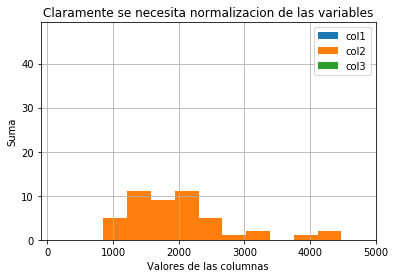

In [12]:
#Visualizacion rapida de los datos
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Claramente se necesita normalizacion de las variables')
plt.xlabel('Valores de las columnas')
plt.ylabel('Suma')
dummy = plt.legend()

In [13]:
# Normalizacion de las caracteristicas (restar la media y dividir por la desviacion estandar)
# Grabar la media y la desviacion estandar para usarlas despues
# Nota: no modificar la matriz X original, usar una copia 
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Saltarse la primera columna
    if not icol: continue
    #Mas rapido no volver a calcular la media y la desviacino estandar, solo usar los valores guardados    
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

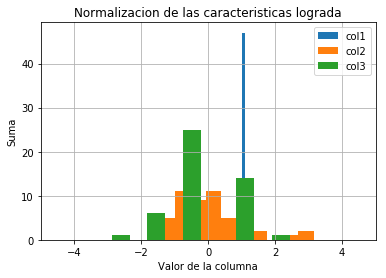

In [14]:
# Visualizacion rapida de las caracteristicas normalizadas
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Normalizacion de las caracteristicas lograda')
plt.xlabel('Valor de la columna')
plt.ylabel('Suma')
dummy = plt.legend()

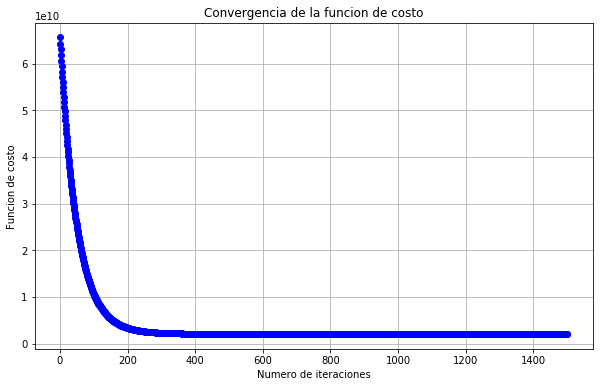

In [15]:
# Ejecutar el gradiente descendente con multiples variables, el Theta inicial sigue siendo ceros
# Nota: Esto no funcionaria si no se hubiera realizado la normalizacion de caracteristicas, 
# se hubiera generado un desbordamiento
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

# Grafica de la convergencia de la funcion de costo
plotConvergence(jvec)

In [16]:
# Print "Valores finales"
print("Verificar el resultado: ¿Cuál es el precio de una casa con 1650 pies cuadrados y 3 dormitorios?")
ytest = np.array([1650.,3.])
# para deshacer la normalizacion, se debe convertir 1650 y 3, luego poner los valores en la hipotesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print("$%0.2f" % float(h(theta,ytestscaled)))

Verificar el resultado: ¿Cuál es el precio de una casa con 1650 pies cuadrados y 3 dormitorios?
$293098.15


In [17]:
from numpy.linalg import inv
# Implementación de la ecuación normal para encontrar una solución analítica a la regresión lineal
def normEqtn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [18]:
print("Predicción de la ecuación normal para el precio de una casa con 1650 pies cuadrados y 3 dormitorios")
print("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

Predicción de la ecuación normal para el precio de una casa con 1650 pies cuadrados y 3 dormitorios
$293081.46


## 2.1 solucion usando librerias de machine learning

In [ ]:
# Copiar el codigo aca